# GRIP @ The Sparks Foundation

# Task 1 - Prediction using Supervised Machine Learning

# Author - Nandani Gupta

###### Task:- In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  

###### Importing libraries : Sikit Learn, Numpy Array, Pandas, Matplotlib

In [28]:
# Importing the required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

##### Step 1 - Reading the data from source

In [29]:
# Reading data from remote link

data = r"C:\Users\ANJALI\OneDrive\Desktop\student_scores - student_scores.csv"
stu_data = pd.read_csv(data)
print("Data import successful.")

stu_data.head(10)

Data import successful.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Step 2 - Input data Visualization

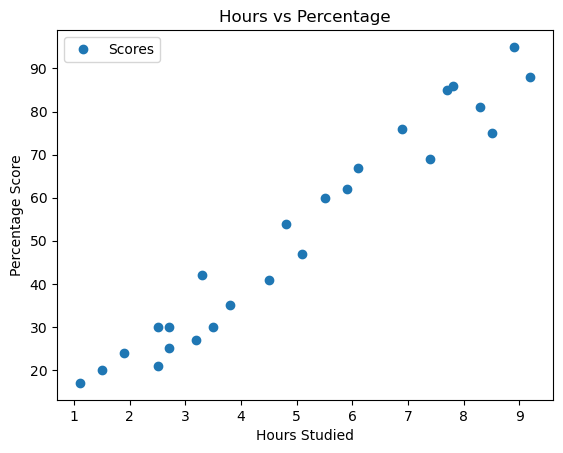

In [30]:
# Plotting the distribution of scores
stu_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

###### From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

##### Step 3 - Data Preprocessing

###### This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [33]:
X = stu_data.iloc[:, :-1].values  
y = stu_data.iloc[:, 1].values  
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [43]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

##### Step 4 - Model Training

###### Splitting the data into training and testing sets, and training the algorithm.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


##### Step 5 - Plotting the Line of regression

###### Now since our model is trained now, its the time to visualize the best-fit line of regression.

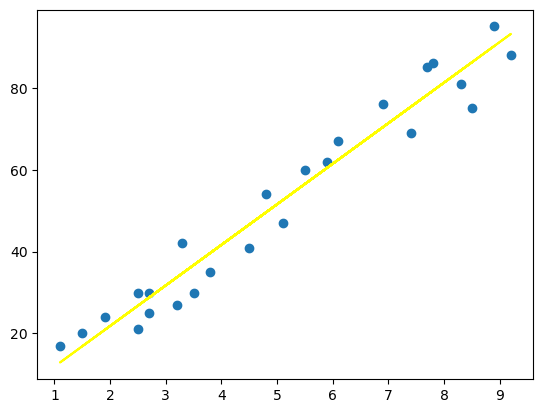

In [36]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='yellow');
plt.show()

##### Step 6 - Making Predictions

###### Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [37]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


##### Step 7 - Comparing Actual result to the Predicted Model result

In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:
#Estimating training and test score
print("Training Score:-",regressor.score(X_train,y_train))
print("Test Score:-",regressor.score(X_test,y_test))

Training Score:- 0.9515510725211552
Test Score:- 0.9454906892105354


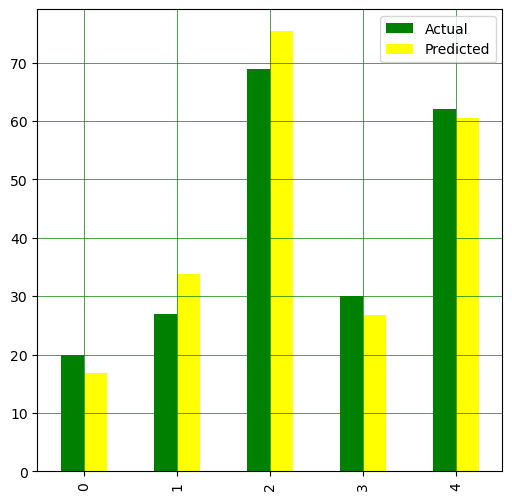

In [40]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
color = ['green','yellow','blue','purple']
df.plot(kind='bar',figsize=(6,6), color = color)
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [41]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


##### Step 8 - Evaluating the model

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:-',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:-', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:-', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:-', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:- 4.183859899002982
Mean Squared Error:- 21.598769307217456
Root Mean Squared Error:- 4.647447612100373
R-2:- 0.9454906892105354


##### Conclusion